# Introspector workbook

multiple attribute evaluation

for each attribute (sorted by occurance):
 for each other attribute(sorted by occurance) :
   what is the probability that this attribute  will co-occur with that attribute?
   what is the probability that this attribute value will determine that attribute value?
   

In [1]:
! pip install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc0
! pip install autokeras==1.0.3

  Cloning https://github.com/keras-team/keras-tuner.git (to revision 1.0.2rc0) to c:\users\jmike\appdata\local\temp\pip-req-build-kodkb6e7

  Running command git clone -q https://github.com/keras-team/keras-tuner.git 'C:\Users\jmike\AppData\Local\Temp\pip-req-build-kodkb6e7'
  Running command git checkout -q 5d16a5a9cd883fe6366d523a5e59b72cfefb7f77



  Created wheel for keras-tuner: filename=keras_tuner-1.0.2rc0-py3-none-any.whl size=89716 sha256=36d27d1d988b46e65ab8cf2eff9f0daa9ea8b435ec2084748bda302cc99d8f28
  Stored in directory: C:\Users\jmike\AppData\Local\Temp\pip-ephem-wheel-cache-rz9xzsqn\wheels\a8\c4\37\ff95f6204383a7bbe6b121f3ec7a0a0b21df08de98a71bbdb8
Successfully built keras-tuner


In [2]:
# get a list of attributes
import json
import pprint
from collections import Counter
from itertools import combinations,permutations

identifier_field = "_id"
type_field = "_type"

known= [identifier_field,type_field]

In [3]:
try:
    import lzma
except ImportError:
    from backports import lzma

In [4]:
! wget https://github.com/jmikedupont2/introspector-data-linux/raw/data_types/expanded_data.json.xz

--2020-07-01 06:24:24--  https://github.com/jmikedupont2/introspector-data-linux/raw/data_types/expanded_data.json.xz
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jmikedupont2/introspector-data-linux/data_types/expanded_data.json.xz [following]
--2020-07-01 06:24:24--  https://raw.githubusercontent.com/jmikedupont2/introspector-data-linux/data_types/expanded_data.json.xz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.116.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.116.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10912236 (10M) [application/octet-stream]
Saving to: 'expanded_data.json.xz.2'

     0K .......... .......... .......... .......... ..........  0% 1.94M 5s
    50K .......... .......... .......... .......... ........

  7950K .......... .......... .......... .......... .......... 75% 9.71M 0s
  8000K .......... .......... .......... .......... .......... 75% 23.7M 0s
  8050K .......... .......... .......... .......... .......... 76% 14.2M 0s
  8100K .......... .......... .......... .......... .......... 76% 20.7M 0s
  8150K .......... .......... .......... .......... .......... 76% 6.46M 0s
  8200K .......... .......... .......... .......... .......... 77% 13.8M 0s
  8250K .......... .......... .......... .......... .......... 77% 10.3M 0s
  8300K .......... .......... .......... .......... .......... 78% 9.83M 0s
  8350K .......... .......... .......... .......... .......... 78% 10.2M 0s
  8400K .......... .......... .......... .......... .......... 79% 31.1M 0s
  8450K .......... .......... .......... .......... .......... 79% 13.0M 0s
  8500K .......... .......... .......... .......... .......... 80% 12.3M 0s
  8550K .......... .......... .......... .......... .......... 80% 5.73M 0s
  8600K ....

In [5]:
types = Counter()
pairs = Counter()

with  lzma.open("expanded_data.json.xz") as fi:
    for li in fi:
        row = json.loads(li)
        type_name = row[type_field]
        _id = row[identifier_field]
        del row[identifier_field]
        del row[type_field]
        for f in ('srcp','chain','_string_len',
                  'scpe',
                  '_level', 'type__id'
        ):
            if f in row:
                del row[f]

        for f in dict(row):
            for f2 in ('srcp','chain','_string_len',
                       'scpe','_type',
                      '_level', '_id'
            ):
                if f2 in f:
                    if f in row:
                        del row[f]

        field_list = list(sorted(row.keys()))
        types[str(field_list)] += 1


In [6]:
for p in types.most_common(100):
    field_list = eval(p[0])
    count = p[1]
    for p in combinations(field_list, 2):
        pairs[str(p)] += count
    for p in combinations(field_list, 3):
        pairs[str(p)] += count
    for p in combinations(field_list, 4):
        pairs[str(p)] += count
        

In [56]:
pairs_df = pd.DataFrame.from_dict(pairs, orient= "index",columns=['count'])

In [80]:
pd.DataFrame.from_dict(types, orient= "index",columns=['count'])

,count
"['name', 'type']",733
"['name__string', 'type_algn', 'type_max', 'type_min', 'type_name', 'type_prec', 'type_sign', 'type_size']",15
"['name__string', 'type_max_value', 'type_min_value', 'type_name_name', 'type_sign', 'type_size_value']",15
"['name__string', 'type_max_value', 'type_min_value', 'type_name_name__string', 'type_sign', 'type_size_value_name']",2
['_string'],32708
...,...
"['prms_chan_chan_chan', 'prms_chan_chan_valu', 'prms_chan_valu_algn', 'prms_chan_valu_ptd', 'prms_chan_valu_size', 'prms_valu_ptd_algn', 'prms_valu_ptd_name', 'prms_valu_size_value', 'retn_name_name__string', 'size_value__string']",1
"['prms_chan_chan_valu', 'prms_chan_valu_algn', 'prms_chan_valu_max', 'prms_chan_valu_min', 'prms_chan_valu_name', 'prms_chan_valu_prec', 'prms_chan_valu_sign', 'prms_chan_valu_size', 'prms_valu_max_value', 'prms_valu_min_value', 'prms_valu_name_name', 'prms_valu_sign', 'prms_valu_size_value', 'retn_name_name__string', 'size_value__string']",1
"['chan_chan_chan_chan', 'chan_chan_chan_valu', 'chan_chan_valu_algn', 'chan_chan_valu_name', 'chan_chan_valu_prec', 'chan_chan_valu_size', 'chan_valu_name_name', 'chan_valu_size_value', 'valu_name_name__string', 'valu_size_value_name']",1
"['chan_chan_chan_chan', 'chan_chan_chan_valu', 'chan_chan_valu_algn', 'chan_chan_valu_name', 'chan_chan_valu_prec', 'chan_chan_valu_size', 'chan_valu_name_name', 'chan_valu_size_value', 'valu_name_name__string', 'valu_size_value_value']",1


In [93]:
names2 = collections.Counter()
for x in types:
    for y in x.split(",") :
        z = y.strip("['").strip("']").strip(" '").strip("' ").strip("'")
        names2[z] += 1
        for z2 in z.split('_'):
            names2[z2] += 1

In [94]:
s = pd.Series(names2, name='fields')

'cnst_value', 'name__string'
'name__string', 'size_value', 'type_algn'

In [95]:
s

name                     59518
type                     59117
name__string              2327
                         22368
string                   22366
                         ...  
refd_ptd_max_value           1
refd_ptd_min_value           1
refd_ptd_name_name           1
refd_ptd_size_value          1
refd_size_value_value        1
Name: fields, Length: 17057, dtype: int64

In [78]:
[x for x in pairs.keys() if x.startswith("('chan')") ]

[]

allnames_env.categories_

In [48]:
import pandas as pd
# https://datatofish.com/create-pandas-dataframe/
names_cols = ('name__string', 'type_algn', 'type_size_value','type_max_value','type_min_value')    
data= {}
for n in names_cols:
    data[n] = []

with lzma.open("expanded_data.json.xz") as fi:
    for li in fi:
        row = json.loads(li)
            
        exists = [f in row for f in names_cols]
        #if all(exists):
            #vals = [row[f] for f in names]
            #print(vals)
            for f in names_cols:
                data[f].append(row[f])
df = pd.DataFrame (data, columns = names_cols)

In [49]:
df

,name__string,type_algn,type_size_value,type_max_value,type_min_value


In [9]:
name__strings = list(df['name__string'].unique())

In [10]:
name__strings

['int',
 'char',
 'long int',
 'unsigned int',
 'long unsigned int',
 '__int128',
 '__int128 unsigned',
 'long long int',
 'long long unsigned int',
 'short int',
 'short unsigned int',
 'signed char',
 'unsigned char',
 '__int128_t',
 '__uint128_t',
 'float',
 'double',
 'long double',
 '_Float32',
 '_Float64',
 '_Float128',
 '_Float32x',
 '_Float64x',
 '_Decimal32',
 '_Decimal64',
 '_Decimal128',
 'complex int',
 'complex float',
 'complex double',
 'complex long double',
 'complex _Float32',
 'complex _Float64',
 'complex _Float128',
 'complex _Float32x',
 'complex _Float64x',
 'void',
 '__builtin_va_list',
 '__builtin_ms_va_list',
 '__builtin_sysv_va_list',
 '__va_list_tag',
 'gp_offset',
 '__builtin_acos',
 'fp_offset',
 'acos',
 'overflow_arg_area',
 '__builtin_acosf',
 'reg_save_area',
 'acosf',
 '__builtin_acosh',
 'acosh',
 '__builtin_acoshf',
 'acoshf',
 '__builtin_acoshl',
 'acoshl',
 '__builtin_acosl',
 'acosl',
 '__builtin_aligned_alloc',
 'aligned_alloc',
 '__builtin_asin

In [12]:
# now we load the word vector
# naming convention extractor
import re
import collections

splitters = [
    '_____',
    '____',
    '___',
    '__',
    '_',
    ' ',
    '*',
    '.',
    "/"
]
def camel_to_snake(name):
  name = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
  return re.sub('([a-z0-9])([A-Z])', r'\1_\2', name)

# camelcase
chars = collections.Counter()

for l in name__strings:
    l = l.strip().strip("\"")
    parts = { camel_to_snake(l) : 1}
   
    for s in splitters:
        for p in dict(parts):
            for s2 in p.split(s):
                if s2 not in parts:
                    parts[s2] =1
                    if p in parts:
                        del[parts[p]]
                    #print(p, s2)

    for c in parts:
        chars[c]+=1
del chars['']

chars.most_common(10)

[('builtin', 1039),
 ('perf', 386),
 ('ia32', 353),
 ('PERF', 305),
 ('BPF', 292),
 ('t', 241),
 ('SC', 215),
 ('event', 182),
 ('fetch', 146),
 ('pthread', 141)]

In [13]:
names = [f for f in list(chars.keys()) if len(f) > 2]
names.append("_")
names.append("__")
names.append("___")
names.append("____")
matcha_re = re.compile(r"(?=("+'|'.join(names)+r"))")

In [14]:
from sklearn.preprocessing import OneHotEncoder
allnames = []
allnames.extend(name__strings)
allnames.extend(names)
all_names = list(set(allnames))

allnames_env = OneHotEncoder(drop='first').fit([ [f,1] for f in allnames])

In [15]:
name__strings

['int',
 'char',
 'long int',
 'unsigned int',
 'long unsigned int',
 '__int128',
 '__int128 unsigned',
 'long long int',
 'long long unsigned int',
 'short int',
 'short unsigned int',
 'signed char',
 'unsigned char',
 '__int128_t',
 '__uint128_t',
 'float',
 'double',
 'long double',
 '_Float32',
 '_Float64',
 '_Float128',
 '_Float32x',
 '_Float64x',
 '_Decimal32',
 '_Decimal64',
 '_Decimal128',
 'complex int',
 'complex float',
 'complex double',
 'complex long double',
 'complex _Float32',
 'complex _Float64',
 'complex _Float128',
 'complex _Float32x',
 'complex _Float64x',
 'void',
 '__builtin_va_list',
 '__builtin_ms_va_list',
 '__builtin_sysv_va_list',
 '__va_list_tag',
 'gp_offset',
 '__builtin_acos',
 'fp_offset',
 'acos',
 'overflow_arg_area',
 '__builtin_acosf',
 'reg_save_area',
 'acosf',
 '__builtin_acosh',
 'acosh',
 '__builtin_acoshf',
 'acoshf',
 '__builtin_acoshl',
 'acoshl',
 '__builtin_acosl',
 'acosl',
 '__builtin_aligned_alloc',
 'aligned_alloc',
 '__builtin_asin

df.head()

In [16]:
df.head()

,name__string,type_algn
0,int,32
1,char,8
2,long int,64
3,unsigned int,32
4,long unsigned int,64


In [17]:
# https://stackoverflow.com/questions/58101126/using-scikit-learn-onehotencoder-with-a-pandas-dataframe
from sklearn.preprocessing import LabelBinarizer
name_encoder = LabelBinarizer()
name_encoder.fit(allnames)
transformed = name_encoder.transform(df['name__string'])
ohe_df = pd.DataFrame(transformed)
df = pd.concat([df, ohe_df], axis=1)
#.drop(['name__string'], axis=1)

In [18]:
df

,name__string,type_algn,0,1,2,3,4,5,6,7,...,10322,10323,10324,10325,10326,10327,10328,10329,10330,10331
0,int,32,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,char,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,long int,64,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,unsigned int,32,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,long unsigned int,64,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10020,__divdc3,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10021,__mulxc3,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10022,__divxc3,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10023,__multc3,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
## retry on a new field
# names2
# now we load the word vector
# naming convention extractor
import re
import collections

splitters = [
    '_____',
    '____',
    '___',
    '__',
    '_',
    ' ',
    '*',
    '.',
    "/"
]

name__strings2 = list(names2.keys())

# camelcase
chars2 = collections.Counter()

for l in name__strings2:
    l = l.strip().strip("\"")
    parts = { camel_to_snake(l) : 1}
   
    for s in splitters:
        for p in dict(parts):
            for s2 in p.split(s):
                if s2 not in parts:
                    parts[s2] =1
                    if p in parts:
                        del[parts[p]]
                    #print(p, s2)

    for c in parts:
        chars[c]+=1
del chars['']

names2a = [f for f in list(chars2.keys()) if len(f) > 2]
names2a.append("_")
names2a.append("__")
names2a.append("___")
names2a.append("____")
matcha_re2 = re.compile(r"(?=("+'|'.join(names2)+r"))")

allnames2 = []
allnames2.extend(name__strings2)
allnames2.extend(names2a)
all_names2 = list(set(allnames2))

# https://stackoverflow.com/questions/58101126/using-scikit-learn-onehotencoder-with-a-pandas-dataframe
pd.DataFrame.from_dict(types, orient= "index",columns=['count'])

name_encoder2 = LabelBinarizer()
name_encoder2.fit(allnames2)
#transformed = name_encoder.transform(df['name__string'])
#ohe_df2 = pd.DataFrame(transformed)


LabelBinarizer()

In [107]:
transformed2a=pd.DataFrame(transformed2)


In [108]:
transformed2a=pd.DataFrame(transformed2)

In [111]:
substring_matches2 = [ [m for m in matcha_re2.findall(n)] for n in names2]


ValueError: You appear to be using a legacy multi-label data representation. Sequence of sequences are no longer supported; use a binary array or sparse matrix instead - the MultiLabelBinarizer transformer can convert to this format.

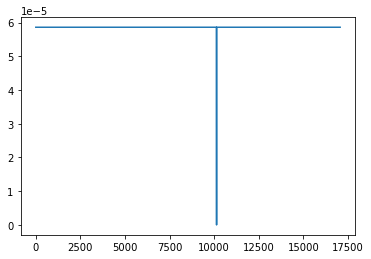

In [109]:
plt.plot(transformed2a.mean())

In [19]:
# for each word, create a vector 
substring_matches = [ [m for m in matcha_re.findall(n)] for n in df['name__string']]

In [20]:
# how many matches do we have
max([ len(x) for x in substring_matches])

18

In [21]:
substring_matches_df = pd.DataFrame(data=substring_matches)

In [22]:
substring_matches_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,int,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,char,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,long,int,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,unsigned,signed,int,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,long,unsigned,signed,int,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10020,_,_,div,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
10021,_,_,mul,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
10022,_,_,div,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
10023,_,_,mul,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


here we are going to transform each column above but without using all memory

In [23]:
temp = ohe_df

for c in substring_matches_df.columns:
    step = name_encoder.transform(substring_matches_df[c].fillna("novaluehere"))
    tmpdf = pd.DataFrame(step)
    temp = temp + tmpdf

In [24]:
#transformed_all = [jobs_encoder.transform(substring_matches_df[c].fillna("novaluehere")) for c in substring_matches_df.columns]

In [25]:
#transformed_all_data = [pd.DataFrame(transformed_all[c]) for c in substring_matches_df.columns]

In [26]:
#temp = transformed_all_data[0]
#for c in substring_matches_df.columns:
#    if c > 0:
#        temp = temp + transformed_all_data[c]
#        
#temp = temp + ohe_df
temp

,0,1,2,3,4,5,6,7,8,9,...,10322,10323,10324,10325,10326,10327,10328,10329,10330,10331
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10021,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
ohe_df = temp

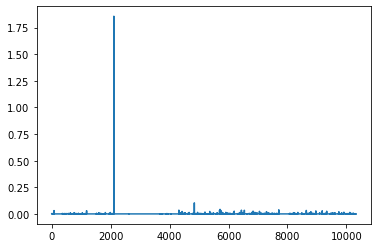

In [28]:
import matplotlib.pyplot as plt
plt.plot(ohe_df.mean())

In [29]:
from sklearn.model_selection import train_test_split
import numpy as np
X = ohe_df
y = df['type_algn']



Convert y into one hot encoding as well

In [30]:
y_encoder = LabelBinarizer()
y_encoder.fit(y)
y_transformed = y_encoder.transform(y)
y_df = pd.DataFrame(y_transformed)


In [31]:
y_df

,0,1,2,3,4
0,0,0,1,0,0
1,1,0,0,0,0
2,0,0,0,1,0
3,0,0,1,0,0
4,0,0,0,1,0
...,...,...,...,...,...
10020,1,0,0,0,0
10021,1,0,0,0,0
10022,1,0,0,0,0
10023,1,0,0,0,0


In [32]:
list(y_encoder.classes_)

[8, 16, 32, 64, 128]

In [33]:

import autokeras as ak

# Initialize the text classifier.

#3clf = ak.TextClassifier(
#    overwrite=True,
#    max_trials=1)

clf = ak.StructuredDataClassifier(
    overwrite=True,
    max_trials=3)

C:\tools\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\tools\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\tools\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\tools\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:544: FutureWarning: P

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)


In [35]:
X_train_ = X_train.to_numpy()
y_train_ = y_train.to_numpy()
clf.fit(X_train_, y_train_, epochs=2)
# Predict with the best model.
predicted_y = clf.predict(X_test_)
# Evaluate the best model with testing data.
print(clf.evaluate(X_test_, y_test_))

See https://github.com/tensorflow/tensorflow/blob/master/tensorflow/python/autograph/g3doc/reference/common_errors.md#warning-large-unrolled-loop-detected
Location:
  File "C:\tools\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)

  File "C:\tools\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)

  File "C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()

  File "C:\tools\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()

  File "C:\tools\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 597, in start
    self.io_loop.start()

  File "C:\tools\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()

  File "C:\tools\Anaconda3\lib\asyncio\base_events.py", line 541, in run_forever
    self._run_once()

  File "C:\tools\Anaconda3\lib\asyncio\base_e

See https://github.com/tensorflow/tensorflow/blob/master/tensorflow/python/autograph/g3doc/reference/common_errors.md#warning-large-unrolled-loop-detected
Location:
  File "C:\tools\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)

  File "C:\tools\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)

  File "C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()

  File "C:\tools\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()

  File "C:\tools\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 597, in start
    self.io_loop.start()

  File "C:\tools\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()

  File "C:\tools\Anaconda3\lib\asyncio\base_events.py", line 541, in run_forever
    self._run_once()

  File "C:\tools\Anaconda3\lib\asyncio\base_e


See https://github.com/tensorflow/tensorflow/blob/master/tensorflow/python/autograph/g3doc/reference/common_errors.md#warning-large-unrolled-loop-detected
Location:
  File "C:\tools\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)

  File "C:\tools\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)

  File "C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()

  File "C:\tools\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()

  File "C:\tools\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 597, in start
    self.io_loop.start()

  File "C:\tools\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()

  File "C:\tools\Anaconda3\lib\asyncio\base_events.py", line 541, in run_forever
    self._run_once()

  File "C:\tools\Anaconda3\lib\asyncio\base_

See https://github.com/tensorflow/tensorflow/blob/master/tensorflow/python/autograph/g3doc/reference/common_errors.md#warning-large-unrolled-loop-detected
Location:
  File "C:\tools\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)

  File "C:\tools\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)

  File "C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()

  File "C:\tools\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()

  File "C:\tools\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 597, in start
    self.io_loop.start()

  File "C:\tools\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()

  File "C:\tools\Anaconda3\lib\asyncio\base_events.py", line 541, in run_forever
    self._run_once()

  File "C:\tools\Anaconda3\lib\asyncio\base_e

See https://github.com/tensorflow/tensorflow/blob/master/tensorflow/python/autograph/g3doc/reference/common_errors.md#warning-large-unrolled-loop-detected
Location:
  File "C:\tools\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)

  File "C:\tools\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)

  File "C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()

  File "C:\tools\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()

  File "C:\tools\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 597, in start
    self.io_loop.start()

  File "C:\tools\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()

  File "C:\tools\Anaconda3\lib\asyncio\base_events.py", line 541, in run_forever
    self._run_once()

  File "C:\tools\Anaconda3\lib\asyncio\base_e

See https://github.com/tensorflow/tensorflow/blob/master/tensorflow/python/autograph/g3doc/reference/common_errors.md#warning-large-unrolled-loop-detected
Location:
  File "C:\tools\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)

  File "C:\tools\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)

  File "C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()

  File "C:\tools\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()

  File "C:\tools\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 597, in start
    self.io_loop.start()

  File "C:\tools\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()

  File "C:\tools\Anaconda3\lib\asyncio\base_events.py", line 541, in run_forever
    self._run_once()

  File "C:\tools\Anaconda3\lib\asyncio\base_e


Epoch 1/2
See https://github.com/tensorflow/tensorflow/blob/master/tensorflow/python/autograph/g3doc/reference/common_errors.md#warning-large-unrolled-loop-detected
Location:
  File "C:\tools\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)

  File "C:\tools\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)

  File "C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()

  File "C:\tools\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()

  File "C:\tools\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 597, in start
    self.io_loop.start()

  File "C:\tools\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()

  File "C:\tools\Anaconda3\lib\asyncio\base_events.py", line 541, in run_forever
    self._run_once()

  File "C:\tools\Anaconda3\lib\asy

See https://github.com/tensorflow/tensorflow/blob/master/tensorflow/python/autograph/g3doc/reference/common_errors.md#warning-large-unrolled-loop-detected
Location:
  File "C:\tools\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)

  File "C:\tools\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)

  File "C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()

  File "C:\tools\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()

  File "C:\tools\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 597, in start
    self.io_loop.start()

  File "C:\tools\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()

  File "C:\tools\Anaconda3\lib\asyncio\base_events.py", line 541, in run_forever
    self._run_once()

  File "C:\tools\Anaconda3\lib\asyncio\base_e


See https://github.com/tensorflow/tensorflow/blob/master/tensorflow/python/autograph/g3doc/reference/common_errors.md#warning-large-unrolled-loop-detected
Location:
  File "C:\tools\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)

  File "C:\tools\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)

  File "C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()

  File "C:\tools\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()

  File "C:\tools\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 597, in start
    self.io_loop.start()

  File "C:\tools\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()

  File "C:\tools\Anaconda3\lib\asyncio\base_events.py", line 541, in run_forever
    self._run_once()

  File "C:\tools\Anaconda3\lib\asyncio\base_

See https://github.com/tensorflow/tensorflow/blob/master/tensorflow/python/autograph/g3doc/reference/common_errors.md#warning-large-unrolled-loop-detected
Location:
  File "C:\tools\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)

  File "C:\tools\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)

  File "C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()

  File "C:\tools\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()

  File "C:\tools\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 597, in start
    self.io_loop.start()

  File "C:\tools\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()

  File "C:\tools\Anaconda3\lib\asyncio\base_events.py", line 541, in run_forever
    self._run_once()

  File "C:\tools\Anaconda3\lib\asyncio\base_e


188/188 [==============================] - ETA: 0s - loss: 1.8433 - accuracy: 0.31 - ETA: 15s - loss: 1.6720 - accuracy: 0.296 - ETA: 20s - loss: 1.6749 - accuracy: 0.343 - ETA: 23s - loss: 1.5931 - accuracy: 0.375 - ETA: 24s - loss: 1.5527 - accuracy: 0.412 - ETA: 25s - loss: 1.5164 - accuracy: 0.432 - ETA: 26s - loss: 1.4649 - accuracy: 0.450 - ETA: 26s - loss: 1.4242 - accuracy: 0.468 - ETA: 26s - loss: 1.3931 - accuracy: 0.475 - ETA: 26s - loss: 1.3727 - accuracy: 0.481 - ETA: 26s - loss: 1.3553 - accuracy: 0.497 - ETA: 26s - loss: 1.3294 - accuracy: 0.513 - ETA: 26s - loss: 1.3156 - accuracy: 0.514 - ETA: 27s - loss: 1.3018 - accuracy: 0.524 - ETA: 27s - loss: 1.2913 - accuracy: 0.529 - ETA: 27s - loss: 1.2645 - accuracy: 0.541 - ETA: 27s - loss: 1.2350 - accuracy: 0.549 - ETA: 27s - loss: 1.2218 - accuracy: 0.555 - ETA: 26s - loss: 1.1970 - accuracy: 0.569 - ETA: 26s - loss: 1.1679 - accuracy: 0.584 - ETA: 26s - loss: 1.1541 - accuracy: 0.587 - ETA: 26s - loss: 1.1438 - accuracy

See https://github.com/tensorflow/tensorflow/blob/master/tensorflow/python/autograph/g3doc/reference/common_errors.md#warning-large-unrolled-loop-detected
Location:
  File "C:\tools\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)

  File "C:\tools\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)

  File "C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()

  File "C:\tools\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()

  File "C:\tools\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 597, in start
    self.io_loop.start()

  File "C:\tools\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()

  File "C:\tools\Anaconda3\lib\asyncio\base_events.py", line 541, in run_forever
    self._run_once()

  File "C:\tools\Anaconda3\lib\asyncio\base_e


188/188 [==============================] - 143s 763ms/step - loss: 0.6878 - accuracy: 0.7558 - val_loss: 130.0194 - val_accuracy: 0.4521
Epoch 2/2
188/188 [==============================] - ETA: 0s - loss: 0.5214 - accuracy: 0.75 - ETA: 16s - loss: 0.5058 - accuracy: 0.750 - ETA: 21s - loss: 0.5940 - accuracy: 0.750 - ETA: 24s - loss: 0.5471 - accuracy: 0.773 - ETA: 26s - loss: 0.5210 - accuracy: 0.787 - ETA: 27s - loss: 0.4785 - accuracy: 0.807 - ETA: 29s - loss: 0.4549 - accuracy: 0.817 - ETA: 30s - loss: 0.4585 - accuracy: 0.816 - ETA: 30s - loss: 0.4399 - accuracy: 0.829 - ETA: 31s - loss: 0.4298 - accuracy: 0.834 - ETA: 31s - loss: 0.4178 - accuracy: 0.838 - ETA: 30s - loss: 0.4050 - accuracy: 0.841 - ETA: 30s - loss: 0.4071 - accuracy: 0.841 - ETA: 30s - loss: 0.3948 - accuracy: 0.848 - ETA: 30s - loss: 0.3845 - accuracy: 0.850 - ETA: 30s - loss: 0.3768 - accuracy: 0.855 - ETA: 30s - loss: 0.3735 - accuracy: 0.856 - ETA: 29s - loss: 0.3661 - accuracy: 0.859 - ETA: 29s - loss: 0.

NotFoundError: Failed to create a NewWriteableFile: .\structured_data_classifier\trial_e069fad31242cf2826b4e3314f9ecbd9\checkpoints\epoch_1\checkpoint_temp_c0afb5e6c2164269b441afa260dcc0cd/part-00000-of-00001.data-00000-of-00001.tempstate1495669839031995163 : The system cannot find the path specified.
; No such process [Op:SaveV2]

In [36]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
model2 = Sequential()

n_cols = X_train.shape[1]
o_cols = y_train.shape[1]
model2.add(Dense(500, activation='relu',input_shape=(n_cols,)))
model2.add(Dense(100), activation='relu')
model2.add(Dense(o_cols), activation='softmax')

model2.compile(loss='categorical_crossentropy', optimizer='adam')

Using TensorFlow backend.


IndexError: tuple index out of range

In [41]:
y_train.shape

(7518,)

In [ ]:
 model2.fit(X_train, y_train, verbose=10, batch_size=1)
    

In [ ]:
model2.evaluate(X_test, y_test, verbose=10)

In [ ]:
print(model2.summary())